In [1]:
#necessario para sincronização com os buckets no s3
%pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [2]:
#setando as variaveis do modelo usando os arquivos salvos nos buckets respectiveis ao ano
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#2017
alu2017 = pd.read_csv('s3://training-files-fnde/2017/alunosCenso2017.csv', sep =';')
escola2017 = pd.read_csv('s3://training-files-fnde/2017/escolasCenso2017.csv', sep = ';')
prest2017 = pd.read_csv('s3://training-files-fnde/2017/prestContas2017.csv', sep =';')
#adicionando o csv de situacaoAlunoXsituacaoEscola
situAlu2017 = pd.read_csv('s3://training-files-fnde/2017/prestContas2017.csv', sep=';')

#2018
alu2018 = pd.read_csv('s3://training-files-fnde/2018/alunosCenso2018.csv', sep =';')
escola2018 = pd.read_csv('s3://training-files-fnde/2018/escolasCenso2018.csv', sep = ';')
prest2018 = pd.read_csv('s3://training-files-fnde/2018/prestContas2018.csv', sep =',')
#adicionando o csv de situacaoAlunoXsituacaoEscola
situAlu2018 = pd.read_csv('s3://training-files-fnde/2018/prestContas2018.csv', sep=';')

aprov2017 = pd.read_csv('s3://training-files-fnde/2017/tratadoAprovacao2017.csv', sep = ',')
aprov2018 = pd.read_csv('s3://training-files-fnde/2018/tratadoAprovacao2018.csv', sep = ',')

#Gerando Tabelao mergeando prestação com escola pelo ID da escola
tabelao2017 = pd.merge(prest2017, escola2017, left_on="Código da Escola", right_on="CO_ENTIDADE")
tabelao2018 = pd.merge(prest2018, escola2018, left_on="Código da Escola", right_on="CO_ENTIDADE")


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (61,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


modens
0    39904
1    28045
Name: Aprovados, dtype: int64

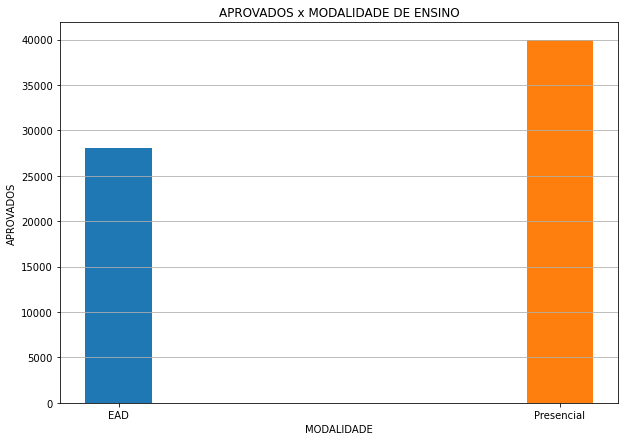

In [3]:
#Aprovação por modalidade de ensino
tabe= aprov2018[['Aprovados', 'modens']].dropna()
aux = tabe.groupby('modens')['Aprovados'].sum()
display(aux)

final= pd.DataFrame(aux)
final= final.transpose()
para= final.iloc[:,1]
atv = final.iloc[:,0]
#criando o gráfico
plt.figure(figsize=(10,7))
para= plt.bar(x='EAD', height= para, width= 0.15)
atv= plt.bar(x= 'Presencial', height=atv , width= 0.15)
plt.xlabel('MODALIDADE')
plt.ylabel('APROVADOS')
plt.title('APROVADOS x MODALIDADE DE ENSINO')
plt.grid(axis='y', linestyle='-')
plt.show()

#### Tabela de aprovação 2017 e 2018

Peguei o número de alunos aprovados e reprovados de cada escola e calculei a taxa de aprovação. Em 'IsAprovado' retornamos 1 se a escola possuir mais de 90% de aprovação ou 0 se possuir menos.

In [4]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
aprov2017 = pd.read_csv('s3://training-files-fnde/2017/tratadoAprovacao2017.csv', sep = ',')
aprov2018 = pd.read_csv('s3://training-files-fnde/2018/tratadoAprovacao2018.csv', sep = ',')

aprov2017['TotalAlunos']= aprov2017['Aprovados'] + aprov2017['Reprovados']
aprov2017['isAprovado'] = np.where(aprov2017['Aprovados']/aprov2017['TotalAlunos'] > 0.9, 1, 0)
aprov2017.head()
aprov2018['TotalAlunos']= aprov2018['Aprovados'] + aprov2018['Reprovados']
aprov2018['isAprovado'] = np.where(aprov2018['Aprovados']/aprov2018['TotalAlunos'] > 0.9, 1, 0)
aprov2018.head()

,TotalAlunos,Aprovados,Reprovados,nomeEscola,codEscola,EEX,adimplenciaUEX,bairro,valorTotalPrevisto,cescolrpae,modens,compens,anoCenso,isAprovado
0,748,591,157,ESCOLA MUNICIPAL ANTONIO FARIAS FILHO,26117576,PREF MUN DE RECIFE,Bloqueio CODDE,SAN MARTIN,18440,5,1,1,2018,0
1,668,648,20,ESCOLA MUNICIPAL DOS COELHOS,26118670,PREF MUN DE RECIFE,Bloqueio CODDE,COELHOS,15020,1,0,4,2018,1
2,412,338,74,ESCOLA MUNICIPAL MONTEIRO LOBATO,26118734,PREF MUN DE RECIFE,Adimplente,PEIXINHOS,9320,2,0,4,2018,0
3,188,183,5,ESCOLA MUNICIPAL JULIO VICENTE ALVES DE ARAUJO,26118955,PREF MUN DE RECIFE,Bloqueio CODDE,MORRO DA CONCEICAO,6640,3,0,4,2018,1
4,233,199,34,ESCOLA MUNICIPAL DE DOIS RIOS,26119129,PREF MUN DE RECIFE,Adimplente,COHAB,7060,6,0,4,2018,0


## Junção com variáveis de infraestrutura

In [5]:
censo2017=pd.read_csv('s3://training-files-fnde/2017/escolasCenso2017.csv', sep= ';')
infra2017= censo2017[[ 'CO_ENTIDADE', 'IN_QUADRA_ESPORTES', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_REFEITORIO', 'IN_INTERNET']]
finalaprov2017= pd.merge(aprov2017,infra2017,left_on='codEscola', right_on='CO_ENTIDADE')
#display(finalaprov2017)

censo2018=pd.read_csv('s3://training-files-fnde/2018/escolasCenso2018.csv', sep= ';')
infra2018= censo2018[[ 'CO_ENTIDADE', 'IN_QUADRA_ESPORTES', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_REFEITORIO', 'IN_INTERNET']]
finalaprov2018= pd.merge(aprov2018,infra2018,left_on='codEscola', right_on='CO_ENTIDADE')
#display(finalaprov2018)

### Legendando os bairros para que eles possam ser utilizados no algortimo de classificação

In [6]:
trocar = {
    'COHAB' : 1,
    'IBURA' : 2,
    'VARZEA': 3,
    'IMBIRIBEIRA': 4,
    'JORDAO': 5,
    'SANTO AMARO': 6,
    'NOVA DESCOBERTA': 7,
    'IPUTINGA': 8,
    'AGUA FRIA': 9,
    'BOA VIAGEM': 10,
    'VASCO DA GAMA': 11,
    'MACAXEIRA': 12,
    'SAN MARTIN': 13,
    'PASSARINHO': 14,
    'TORROES': 15,
    'PINA': 16,
    'AREIAS': 17,
    'CASA AMARELA': 18,
    'BEBERIBE': 19,
    'CAMPO GRANDE': 20,
    'LINHA DO TIRO': 21,
    'PRADO': 22,
    'IPSEP': 23,
    'FUNDAO': 24,
    'ILHA JOANA BEZERRA': 25,
    'AFOGADOS': 26,
    'TORRE': 27,
    'ALTO JOSE BONIFACIO': 28,
    'DOIS UNIDOS': 29,
    'BARRO': 30,
    'ENCRUZILHADA': 31,
    'CORREGO DO JENIPAPO': 32,
    'COQUEIRAL': 33,
    'CORDEIRO': 34,
    'ENGENHO DO MEIO': 35,
    'BREJO DA GUABIRABA': 36,
    'ALTO SANTA TEREZINHA': 37,
    'ESTANCIA': 38,
    'SANCHO': 39,
    'CAMPINA DO BARRETO': 40,
    'MUSTARDINHA': 41,
    'TEJIPIO': 42,
    'ILHA DO LEITE': 43,
    'DERBY': 44,
    'ILHA DO RETIRO': 45,
    'MADALENA': 46,
    'MANGABEIRA': 47,
    'CAXANGA': 48,
    'PEIXINHOS': 49,
    'CAJUEIRO': 50,
    'ESPINHEIRO': 51,
    'TORREAO': 52,
    'TAMARINEIRA': 53,
    'COELHOS': 54,
    'BOA VISTA': 55,
    'GUABIRABA': 56,
    'RECIFE': 57,
    'MORRO DA CONCEICAO': 58,
    'JAQUEIRA': 59,
    'ALTO JOSE DO PINHO': 60,
    'ARRUDA': 61,
    'BRASILIA TEIMOSA': 62,
    'DOIS IRMAOS': 63,
    'BREJO DE BEBERIBE ': 64
}
finalaprov2017['bairro_legenda'] = finalaprov2017['bairro'].map(trocar)
finalaprov2018['bairro_legenda'] = finalaprov2018['bairro'].map(trocar)
finalaprov2017.head()

,TotalAlunos,Aprovados,Reprovados,nomeEscola,codEscola,EEX,adimplenciaUEX,bairro,valorTotalPrevisto,cescolrpae,modens,compens,anoCenso,isAprovado,CO_ENTIDADE,IN_QUADRA_ESPORTES,IN_BIBLIOTECA_SALA_LEITURA,IN_REFEITORIO,IN_INTERNET,bairro_legenda
0,668,501,167,ESCOLA MUNICIPAL ANTONIO FARIAS FILHO,26117576,PREF MUN DE RECIFE,Adimplente,SAN MARTIN,18520,5,1,0,2017,0,26117576,1.0,1.0,0.0,1.0,13.0
1,667,625,42,ESCOLA MUNICIPAL DOS COELHOS,26118670,PREF MUN DE RECIFE,Adimplente,COELHOS,13000,1,0,4,2017,1,26118670,0.0,1.0,0.0,0.0,54.0
2,370,273,97,ESCOLA MUNICIPAL MONTEIRO LOBATO,26118734,PREF MUN DE RECIFE,Adimplente,PEIXINHOS,9680,2,0,4,2017,0,26118734,0.0,1.0,1.0,1.0,49.0
3,191,179,12,ESCOLA MUNICIPAL JULIO VICENTE ALVES DE ARAUJO,26118955,PREF MUN DE RECIFE,Adimplente,MORRO DA CONCEICAO,7420,3,0,4,2017,1,26118955,0.0,0.0,1.0,1.0,58.0
4,250,203,47,ESCOLA MUNICIPAL DE DOIS RIOS,26119129,PREF MUN DE RECIFE,Adimplente,COHAB,6940,6,0,4,2017,0,26119129,0.0,1.0,1.0,1.0,1.0


## Criando e treinando o modelo com essa base de dados

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 2017
x2017 = finalaprov2017[["valorTotalPrevisto","IN_QUADRA_ESPORTES","IN_BIBLIOTECA_SALA_LEITURA","IN_REFEITORIO","IN_INTERNET"]]
y2017 = finalaprov2017["isAprovado"]

SEED = 25
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x2017, y2017, test_size = 0.3,
                                                         stratify = y2017)

modelo2017 = DecisionTreeClassifier()
modelo2017.fit(raw_treino_x, treino_y)
previsoes2017 = modelo2017.predict(raw_teste_x)

acuracia2017 = accuracy_score(teste_y, previsoes2017) * 100
acuracia2017 = round(acuracia2017,2)
print("A acurácia de 2017 foi",acuracia2017,"%")

A acurácia de 2017 foi 73.53 %


In [8]:
## 2018
x2018 = finalaprov2018[["valorTotalPrevisto","IN_QUADRA_ESPORTES","IN_BIBLIOTECA_SALA_LEITURA","IN_REFEITORIO","IN_INTERNET"]]
y2018 = finalaprov2018["isAprovado"]

SEED = 25
np.random.seed(SEED)
raw_treino_x_2018, raw_teste_x_2018, treino_y_2018, teste_y_2018 = train_test_split(x2018, y2018, test_size = 0.3,
                                                         stratify = y2018)

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x_2018, treino_y_2018)
previsoes = modelo.predict(raw_teste_x_2018)

acuracia2018 = accuracy_score(teste_y_2018, previsoes) * 100
print("A acurácia de 2018 foi %.2f%%" % acuracia2018)

A acurácia de 2018 foi 56.52%


### Dummy Base Line

In [9]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='most_frequent')
dummy_stratified.fit(raw_treino_x, treino_y)
acuraciabobinha = dummy_stratified.score(raw_teste_x, teste_y) * 100
print("A acuracia do bobinho foi %.2f%%" % acuraciabobinha)

A acuracia do bobinho foi 52.94%


In [10]:
# Alguns testes e exemplos
escolaModelo = [12000,1,0,1,0]
previsaoEscolaModelo = modelo2017.predict([escolaModelo])
previsaoEscolaModelo = str(previsaoEscolaModelo)
#0 NÃO TERÁ MAIORIA APROVADA
#1 TERÁ MAIORIA APROVADA
if previsaoEscolaModelo == '[1]':
    print("A maioria dos alunos será Aprovado")
else:   
    print("A maioria dos alunos será Reprovada")


A maioria dos alunos será Aprovado
